# 시계열을 위한 딥러닝

## 다양한 종류의 시계열 작업

## 기온 예측 문제

In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-07-13 00:57:33--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.200.72, 54.231.229.152, 52.216.40.64, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.200.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  44.3MB/s    in 0.3s    

2023-07-13 00:57:33 (44.3 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
!ls -al

total 68660
drwxr-xr-x 1 root root     4096 Jul 12 01:02 .
drwxr-xr-x 1 root root     4096 Jul 12 00:46 ..
drwxr-xr-x 4 root root     4096 Jul 10 13:37 .config
-rw-r--r-- 1 root root 43153572 Dec 29  2020 jena_climate_2009_2016.csv
-rw-r--r-- 1 root root 13565642 Dec 29  2020 jena_climate_2009_2016.csv.zip
-rw-r--r-- 1 root root 13565642 Dec 29  2020 jena_climate_2009_2016.csv.zip.1
drwxr-xr-x 2 root root     4096 Jul 12 00:47 __MACOSX
drwxr-xr-x 1 root root     4096 Jul 10 13:38 sample_data


**예나 날씨 데이터셋 조사하기**

In [2]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")

lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
len(header)

15

**데이터 파싱**

In [3]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

In [ ]:
raw_data.shape

(420451, 14)

**전체 기온을 그래프로 그리기**

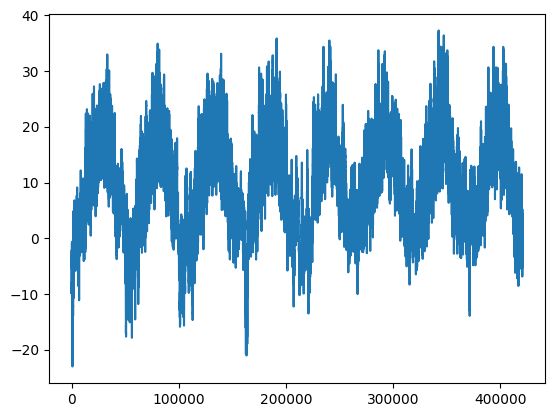

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.show()

**처음 10일간의 기온을 그래프로 그리기**

10분마다 데이터 기록,

In [ ]:
24*6*10

1440

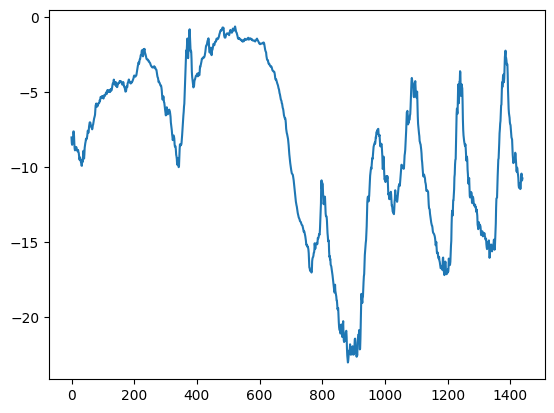

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1440), temperature[:1440])
plt.show()

**각 분할에 사용할 샘플 수 계산하기**

In [7]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [ ]:
raw_data[0]

array([ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
        9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
        1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
        1.75000e+00,  1.52300e+02])

### 데이터 준비

**데이터 정규화**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [5]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
print(int_sequence)
print(int_sequence[:-3])
print(int_sequence[3:])
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)
print()
for inputs, targets in dummy_dataset: # inputs와 targets는 각각 입력 시퀀스와 대상 값을 포함하는 numpy 배열
    print(inputs.shape)
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6]
[3 4 5 6 7 8 9]

(2, 3)
[0, 1, 2] 3
[1, 2, 3] 4
(2, 3)
[2, 3, 4] 5
[3, 4, 5] 6
(1, 3)
[4, 5, 6] 7


In [ ]:
print(inputs.shape, targets.shape)

(1, 3) (1,)


In [ ]:
for i, (inputs, targets) in enumerate(dummy_dataset):
    print(f"Batch {i+1}")
    for j in range(inputs.shape[0]):
        print([int(x) for x in inputs[j]], int(targets[j]))
    print()


Batch 1
[0, 1, 2] 3

Batch 2
[1, 2, 3] 4

Batch 3
[2, 3, 4] 5

Batch 4
[3, 4, 5] 6

Batch 5
[4, 5, 6] 7



**훈련, 검증, 테스트 데이터셋 만들기**

In [8]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

**훈련 데이터셋의 배치 크기 확인하기**

In [9]:
for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

샘플 크기: (256, 120, 14)
타깃 크기: (256,)


### 상식 수준의 기준점

**상식적인 기준 모델의 MAE 계산하기**

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"검증 MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"테스트 MAE: {evaluate_naive_method(test_dataset):.2f}")

검증 MAE: 2.44
테스트 MAE: 2.62


### 기본적인 머신 러닝 모델 시도해 보기

**밀집 연결 모델 훈련하고 평가하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 57s 63ms/step - loss: 12.6137 - mae: 2.7434 - val_loss: 11.6078 - val_mae: 2.6754
Epoch 2/10
819/819 [==============================] - 51s 62ms/step - loss: 8.9352 - mae: 2.3489 - val_loss: 11.9000 - val_mae: 2.7219
Epoch 3/10
819/819 [==============================] - 51s 62ms/step - loss: 8.2435 - mae: 2.2588 - val_loss: 10.7563 - val_mae: 2.5739
Epoch 4/10
819/819 [==============================] - 44s 54ms/step - loss: 7.7347 - mae: 2.1921 - val_loss: 10.7146 - val_mae: 2.5758
Epoch 5/10
819/819 [==============================] - 50s 61ms/step - loss: 7.3998 - mae: 2.1470 - val_loss: 11.0530 - val_mae: 2.6234
Epoch 6/10
819/819 [==============================] - 42s 51ms/step - loss: 7.1444 - mae: 2.1111 - val_loss: 11.0338 - val_mae: 2.6172
Epoch 7/10
819/819 [==============================] - 43s 53ms/step - loss: 6.9418 - mae: 2.0827 - val_loss: 11.0310 - val_mae: 2.6271
Epoch 8/10
819/819 [==============================] - 

**결과 그래프 그리기**

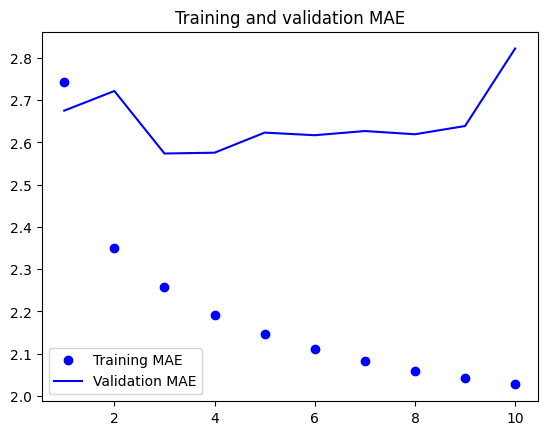

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 1D 합성곱 모델 시도해 보기

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 51s 55ms/step - loss: 21.8792 - mae: 3.6876 - val_loss: 17.2657 - val_mae: 3.3036
Epoch 2/10
819/819 [==============================] - 44s 53ms/step - loss: 15.9080 - mae: 3.1692 - val_loss: 15.1078 - val_mae: 3.0585
Epoch 3/10
819/819 [==============================] - 52s 63ms/step - loss: 14.5515 - mae: 3.0264 - val_loss: 17.1052 - val_mae: 3.2967
Epoch 4/10
819/819 [==============================] - 44s 53ms/step - loss: 13.6062 - mae: 2.9221 - val_loss: 13.9129 - val_mae: 2.9301
Epoch 5/10
819/819 [==============================] - 43s 53ms/step - loss: 12.9560 - mae: 2.8482 - val_loss: 14.9293 - val_mae: 3.0212
Epoch 6/10
819/819 [==============================] - 53s 64ms/step - loss: 12.4400 - mae: 2.7884 - val_loss: 14.0762 - val_mae: 2.9451
Epoch 7/10
819/819 [==============================] - 44s 54ms/step - loss: 11.9985 - mae: 2.7385 - val_loss: 14.3407 - val_mae: 2.9750
Epoch 8/10
819/819 [============================

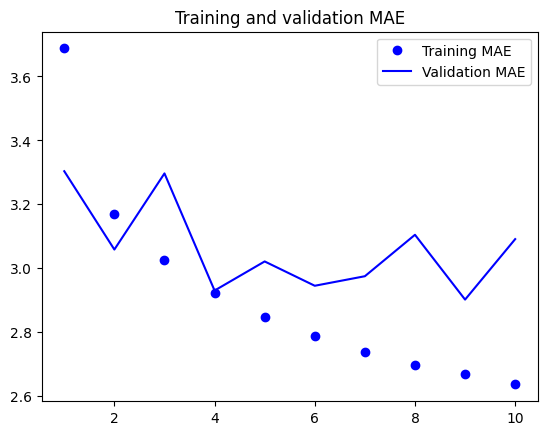

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 첫 번째 순환 신경망

**간단한 LSTM 기반 모델**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 58s 67ms/step - loss: 35.8650 - mae: 4.3294 - val_loss: 11.5087 - val_mae: 2.6109
Epoch 2/10
819/819 [==============================] - 46s 56ms/step - loss: 10.5527 - mae: 2.5174 - val_loss: 9.5540 - val_mae: 2.4192
Epoch 3/10
819/819 [==============================] - 47s 57ms/step - loss: 9.2910 - mae: 2.3657 - val_loss: 9.4141 - val_mae: 2.4098
Epoch 4/10
819/819 [==============================] - 47s 57ms/step - loss: 8.5897 - mae: 2.2813 - val_loss: 9.9059 - val_mae: 2.4402
Epoch 5/10
819/819 [==============================] - 54s 66ms/step - loss: 8.1563 - mae: 2.2277 - val_loss: 10.4450 - val_mae: 2.4816
Epoch 6/10
819/819 [==============================] - 55s 67ms/step - loss: 7.8682 - mae: 2.1896 - val_loss: 10.7945 - val_mae: 2.5084
Epoch 7/10
819/819 [==============================] - 46s 55ms/step - loss: 7.6261 - mae: 2.1564 - val_loss: 10.6097 - val_mae: 2.5167
Epoch 8/10
819/819 [==============================] - 47

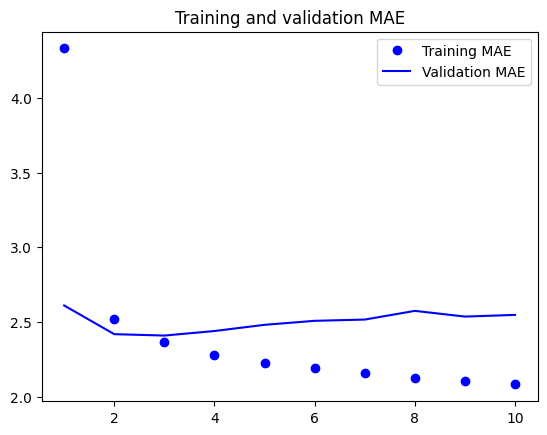

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 순환 신경망 이해하기

**넘파이로 구현한 간단한 RNN**

In [ ]:
# RNN 정방향 계산
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    # print(state_t.shape)
final_output_sequence = np.stack(successive_outputs, axis=0)

In [ ]:
print(inputs.shape)
print(final_output_sequence.shape)

(100, 32)
(100, 64)


### 케라스의 순환 층

**어떤 길이의 시퀀스도 처리할 수 있는 RNN 층**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)
print(outputs.shape)

(None, 16)


**마지막 출력 스텝만 반환하는 RNN 층**

In [11]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs) # RNN 레이어는 마지막 시간 단계의 출력만을 반환
print(outputs.shape)

(None, 16)


**전체 출력 시퀀스를 반환하는 RNN 층**

In [12]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs) #  RNN 레이어는 각 시간 단계에서 출력을 생성하며, 모든 시간 단계에 대한 출력을 3D 텐서로 반환
print(outputs.shape)

(None, 120, 16)


**스태킹(stacking) RNN 층**

In [13]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

## 순환 신경망의 고급 사용법

### 과대적합을 감소하기 위해 순환 드롭아웃 사용하기

**드롭아웃 규제를 적용한 LSTM 모델 훈련하고 평가하기**

In [14]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
#x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/50
819/819 [==============================] - 52s 54ms/step - loss: 114.3397 - mae: 8.6515 - val_loss: 66.3654 - val_mae: 6.6071
Epoch 2/50
819/819 [==============================] - 51s 62ms/step - loss: 71.3344 - mae: 6.7183 - val_loss: 54.4377 - val_mae: 5.9821
Epoch 3/50
819/819 [==============================] - 43s 52ms/step - loss: 66.4975 - mae: 6.4246 - val_loss: 49.2006 - val_mae: 5.5961
Epoch 4/50
819/819 [==============================] - 51s 62ms/step - loss: 63.3390 - mae: 6.2259 - val_loss: 45.6570 - val_mae: 5.3817
Epoch 5/50
819/819 [==============================] - 51s 62ms/step - loss: 61.2942 - mae: 6.0905 - val_loss: 41.7237 - val_mae: 5.0755
Epoch 6/50
819/819 [==============================] - 44s 54ms/step - loss: 60.2569 - mae: 6.0211 - val_loss: 40.9436 - val_mae: 5.1159
Epoch 7/50
819/819 [==============================] - 44s 54ms/step - loss: 59.3173 - mae: 5.9615 - val_loss: 40.7075 - val_mae: 5.1657
Epoch 8/50
819/819 [===========================

KeyboardInterrupt: ignored

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

### 스태킹 순환 층

**드롭아웃 규제와 스태킹을 적용한 GRU 모델을 훈련하고 평가하기**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
# x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
# x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.GRU(32, return_sequences=True)(inputs)
x = layers.GRU(32)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 23s 24ms/step - loss: 23.8203 - mae: 3.6085 - val_loss: 9.1113 - val_mae: 2.3265
Epoch 2/50
819/819 [==============================] - 19s 24ms/step - loss: 13.4428 - mae: 2.8387 - val_loss: 8.9302 - val_mae: 2.3205
Epoch 3/50
819/819 [==============================] - 20s 24ms/step - loss: 12.4980 - mae: 2.7414 - val_loss: 9.3066 - val_mae: 2.3674
Epoch 4/50
819/819 [==============================] - 20s 24ms/step - loss: 11.7165 - mae: 2.6547 - val_loss: 9.7335 - val_mae: 2.4234
Epoch 5/50
819/819 [==============================] - 21s 25ms/step - loss: 11.0335 - mae: 2.5730 - val_loss: 9.1506 - val_mae: 2.3421
Epoch 6/50
819/819 [==============================] - 20s 25ms/step - loss: 10.4060 - mae: 2.5011 - val_loss: 10.8818 - val_mae: 2.5821
Epoch 7/50
819/819 [==============================] - 20s 25ms/step - loss: 9.7572 - mae: 2.4213 - val_loss: 10.0641 - val_mae: 2.4677
Epoch 8/50
819/819 [==============================] - 

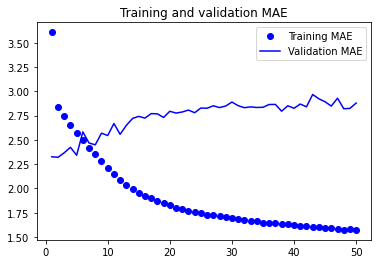

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 양방향 RNN 사용하기

시퀀스를 거꾸로 뒤집어 LSTM 모델 훈련하기 (책에는 없음)

In [15]:
def train_generator():
    while True:
        for samples, targets in train_dataset:
            yield samples[:, ::-1, :], targets

def val_generator():
    while True:
        for samples, targets in val_dataset:
            yield samples[:, ::-1, :], targets

train_gen = train_generator()
val_gen = val_generator()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
# x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_gen,
                    epochs=10,
                    steps_per_epoch=819,
                    validation_data=val_gen,
                    validation_steps=410)

Epoch 1/10
819/819 [==============================] - 71s 77ms/step - loss: 35.7771 - mae: 4.5356 - val_loss: 15.4286 - val_mae: 3.0979
Epoch 2/10
819/819 [==============================] - 59s 72ms/step - loss: 18.0480 - mae: 3.3145 - val_loss: 13.5001 - val_mae: 2.8424
Epoch 3/10
819/819 [==============================] - 80s 97ms/step - loss: 15.5976 - mae: 3.0815 - val_loss: 11.1659 - val_mae: 2.5838
Epoch 4/10
819/819 [==============================] - 79s 97ms/step - loss: 14.6233 - mae: 2.9810 - val_loss: 11.1169 - val_mae: 2.5870
Epoch 5/10
819/819 [==============================] - 60s 73ms/step - loss: 13.9910 - mae: 2.9145 - val_loss: 11.1026 - val_mae: 2.5981
Epoch 6/10
819/819 [==============================] - 67s 73ms/step - loss: 13.4936 - mae: 2.8576 - val_loss: 10.0434 - val_mae: 2.4412
Epoch 7/10
819/819 [==============================] - 55s 68ms/step - loss: 13.1329 - mae: 2.8188 - val_loss: 10.5011 - val_mae: 2.4809
Epoch 8/10
819/819 [============================

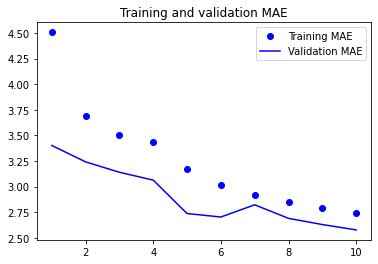

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

**양방향 LSTM 모델 훈련하고 평가하기**

In [16]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
819/819 [==============================] - 52s 58ms/step - loss: 114.6752 - mae: 8.6466 - val_loss: 87.2546 - val_mae: 7.3911
Epoch 2/10
819/819 [==============================] - 48s 58ms/step - loss: 66.6225 - mae: 6.3559 - val_loss: 47.1934 - val_mae: 5.2926
Epoch 3/10
819/819 [==============================] - 48s 58ms/step - loss: 41.8460 - mae: 4.9177 - val_loss: 29.5850 - val_mae: 4.1761
Epoch 4/10
819/819 [==============================] - 46s 56ms/step - loss: 31.7009 - mae: 4.2239 - val_loss: 23.2528 - val_mae: 3.6925
Epoch 5/10
819/819 [==============================] - 48s 59ms/step - loss: 26.2911 - mae: 3.8642 - val_loss: 19.8571 - val_mae: 3.4465
Epoch 6/10
819/819 [==============================] - 47s 57ms/step - loss: 22.7950 - mae: 3.6404 - val_loss: 17.3974 - val_mae: 3.2192
Epoch 7/10
819/819 [==============================] - 47s 57ms/step - loss: 20.5202 - mae: 3.4864 - val_loss: 18.3276 - val_mae: 3.3662
Epoch 8/10
819/819 [===========================

### 더 나아가서

## 요약